In [2]:
train_path = "https://media.githubusercontent.com/media/PavelKilko/applied-application-of-neural-networks/refs/heads/master/lab-6-7/small-dataset/train.csv"
val_path = "https://media.githubusercontent.com/media/PavelKilko/applied-application-of-neural-networks/refs/heads/master/lab-6-7/small-dataset/val.csv"
test_path = "https://media.githubusercontent.com/media/PavelKilko/applied-application-of-neural-networks/refs/heads/master/lab-6-7/small-dataset/test.csv"

In [12]:
def preprocess_data(train_path, val_path, test_path):
    import pandas as pd
    import numpy as np
    from tensorflow.keras.utils import to_categorical

    train_dataset = pd.read_csv(train_path)
    val_dataset = pd.read_csv(val_path)
    test_dataset = pd.read_csv(test_path)

    X_train = train_dataset.drop('font', axis=1).astype('float32').values
    y_train = train_dataset['font'].values

    X_val = val_dataset.drop('font', axis=1).astype('float32').values
    y_val = val_dataset['font'].values

    X_test = test_dataset.drop('font', axis=1).astype('float32').values
    y_test = test_dataset['font'].values

    X_train = X_train.reshape(-1, 20, 20, 1)
    X_val = X_val.reshape(-1, 20, 20, 1)
    X_test = X_test.reshape(-1, 20, 20, 1)

    unique_labels = np.unique(y_train)
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    y_train_encoded = np.array([label_to_index[label] for label in y_train])
    y_val_encoded = np.array([label_to_index[label] for label in y_val])
    y_test_encoded = np.array([label_to_index[label] for label in y_test])

    num_classes = len(unique_labels)

    y_train = to_categorical(y_train_encoded, num_classes=num_classes)
    y_val = to_categorical(y_val_encoded, num_classes=num_classes)
    y_test = to_categorical(y_test_encoded, num_classes=num_classes)

    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes, unique_labels

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test, num_classes, unique_labels = preprocess_data(train_path, val_path, test_path)

In [4]:
unique_labels

array(['AGENCY', 'BASKERVILLE', 'BAUHAUS', 'BELL', 'BERLIN', 'BERNARD',
       'BLACKADDER', 'BRADLEY', 'BRITANNIC', 'BROADWAY', 'BRUSH',
       'BUXTON', 'CALISTO', 'CASTELLAR', 'CENTAUR', 'CHILLER',
       'COMMERCIALSCRIPT', 'CONSOLAS', 'COURIER', 'CURLZ', 'EDWARDIAN',
       'ENGLISH', 'GUNPLAY', 'JOKERMAN', 'KRISTEN', 'MONOSPAC821',
       'MONOTXT', 'RAGE', 'SIMPLEX', 'VINER'], dtype=object)

In [13]:
def build_and_train_model_v1_0(X_train, y_train, X_val, y_val, X_test, y_test, num_classes):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from tensorflow.keras import regularizers

    model = Sequential()

    model.add(Input(shape=(20, 20, 1)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_val, y_val),
        batch_size=128,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training CNN model...
Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - accuracy: 0.1850 - loss: 3.7265 - val_accuracy: 0.0188 - val_loss: 6.0403 - learning_rate: 0.0010
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.3393 - loss: 2.6676 - val_accuracy: 0.1929 - val_loss: 3.9635 - learning_rate: 0.0010
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 42s 155ms/step - accuracy: 0.3950 - loss: 2.3794 - val_accuracy: 0.4299 - val_loss: 2.3055 - learning_rate: 0.0010
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.4288 - loss: 2.2206 - val_accuracy: 0.4436 - val_loss: 2.2830 - learning_rate: 0.0010
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.4505 - loss: 2.1084 - val_accuracy: 0.5106 - val_loss: 1.9207 - learning_rate: 0.0010
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.4771 - loss: 1.9872 - val_accuracy: 0.5294 - val_loss: 1.8239 - learning_rate: 0.0010
Epoch 7/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 4

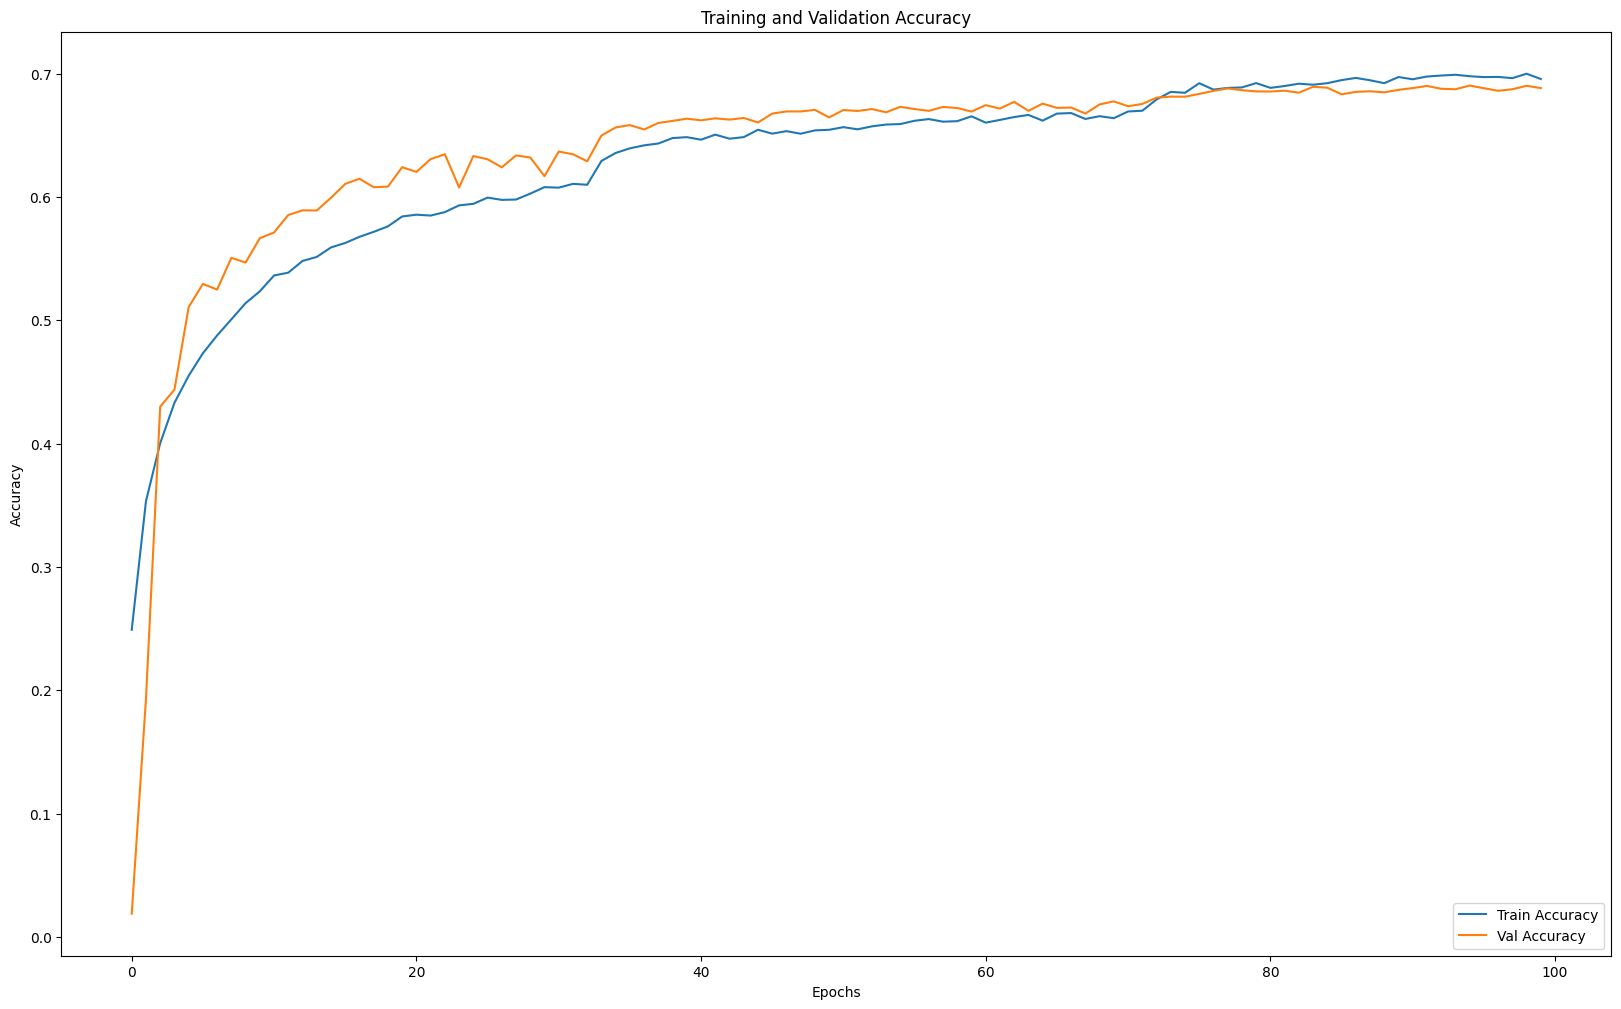

,Test Accuracy,Test Loss
0,0.692352,1.155123


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

results = []

plt.figure(figsize=(20, 12))

print(f"Training CNN model-v.1.0 ...")

model_v1_0, history, test_loss, test_acc = build_and_train_model_v1_0(X_train, y_train, X_val, y_val, X_test, y_test, num_classes)

results.append({"Test Accuracy": test_acc, "Test Loss": test_loss})

plt.plot(history.history['accuracy'], label=f'Train Accuracy')
plt.plot(history.history['val_accuracy'], label=f'Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

results_df

In [18]:
def build_and_train_model_v1_1(X_train, y_train, X_val, y_val, X_test, y_test, num_classes):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Input
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from tensorflow.keras import regularizers

    model = Sequential()

    model.add(Input(shape=(20, 20, 1)))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(256, kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_val, y_val),
        batch_size=128,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training CNN model-v.1.1 ...
Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 175s 434ms/step - accuracy: 0.1561 - loss: 4.2678 - val_accuracy: 0.2352 - val_loss: 4.1459 - learning_rate: 5.0000e-04
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 142s 435ms/step - accuracy: 0.3043 - loss: 3.0702 - val_accuracy: 0.2492 - val_loss: 3.4388 - learning_rate: 5.0000e-04
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 141s 433ms/step - accuracy: 0.3566 - loss: 2.6972 - val_accuracy: 0.4133 - val_loss: 2.3939 - learning_rate: 5.0000e-04
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 141s 430ms/step - accuracy: 0.3973 - loss: 2.4581 - val_accuracy: 0.4766 - val_loss: 2.1042 - learning_rate: 5.0000e-04
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 142s 429ms/step - accuracy: 0.4296 - loss: 2.2915 - val_accuracy: 0.4962 - val_loss: 1.9801 - learning_rate: 5.0000e-04
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 106s 433ms/step - accuracy: 0.4554 - loss: 2.1273 - val_accuracy: 0.5137 - val_loss: 1.8871 - learning_rate: 5.0000e-04
Epoch

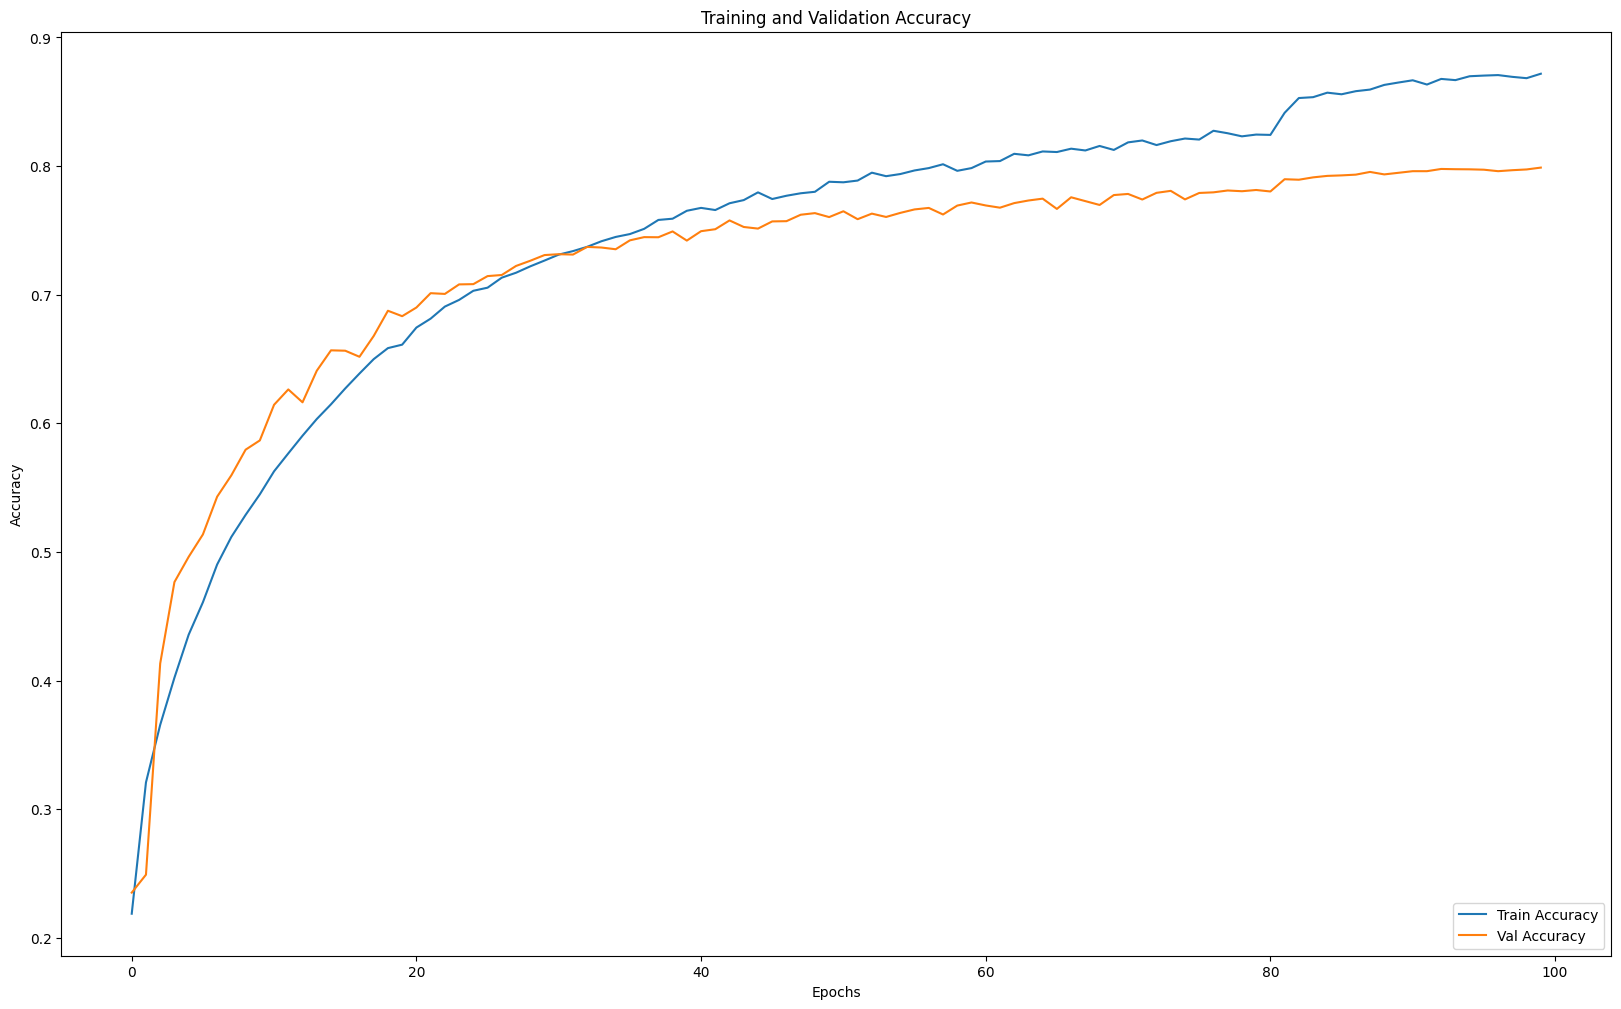

,Test Accuracy,Test Loss
0,0.793236,0.791115


In [20]:
import matplotlib.pyplot as plt
import pandas as pd

results = []

plt.figure(figsize=(20, 12))

print(f"Training CNN model-v.1.1 ...")

model_v1_1, history, test_loss, test_acc = build_and_train_model_v1_1(X_train, y_train, X_val, y_val, X_test, y_test, num_classes)

results.append({"Test Accuracy": test_acc, "Test Loss": test_loss})

plt.plot(history.history['accuracy'], label=f'Train Accuracy')
plt.plot(history.history['val_accuracy'], label=f'Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

results_df

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def display_confusion_matrix(model, X_test, y_test, class_names=None, figsize=(20, 20)):
    y_true = np.argmax(y_test, axis=1)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=figsize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', values_format='.0f', ax=plt.gca())
    plt.title("Confusion Matrix")
    plt.xticks(rotation=90)
    plt.show()

326/326 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step


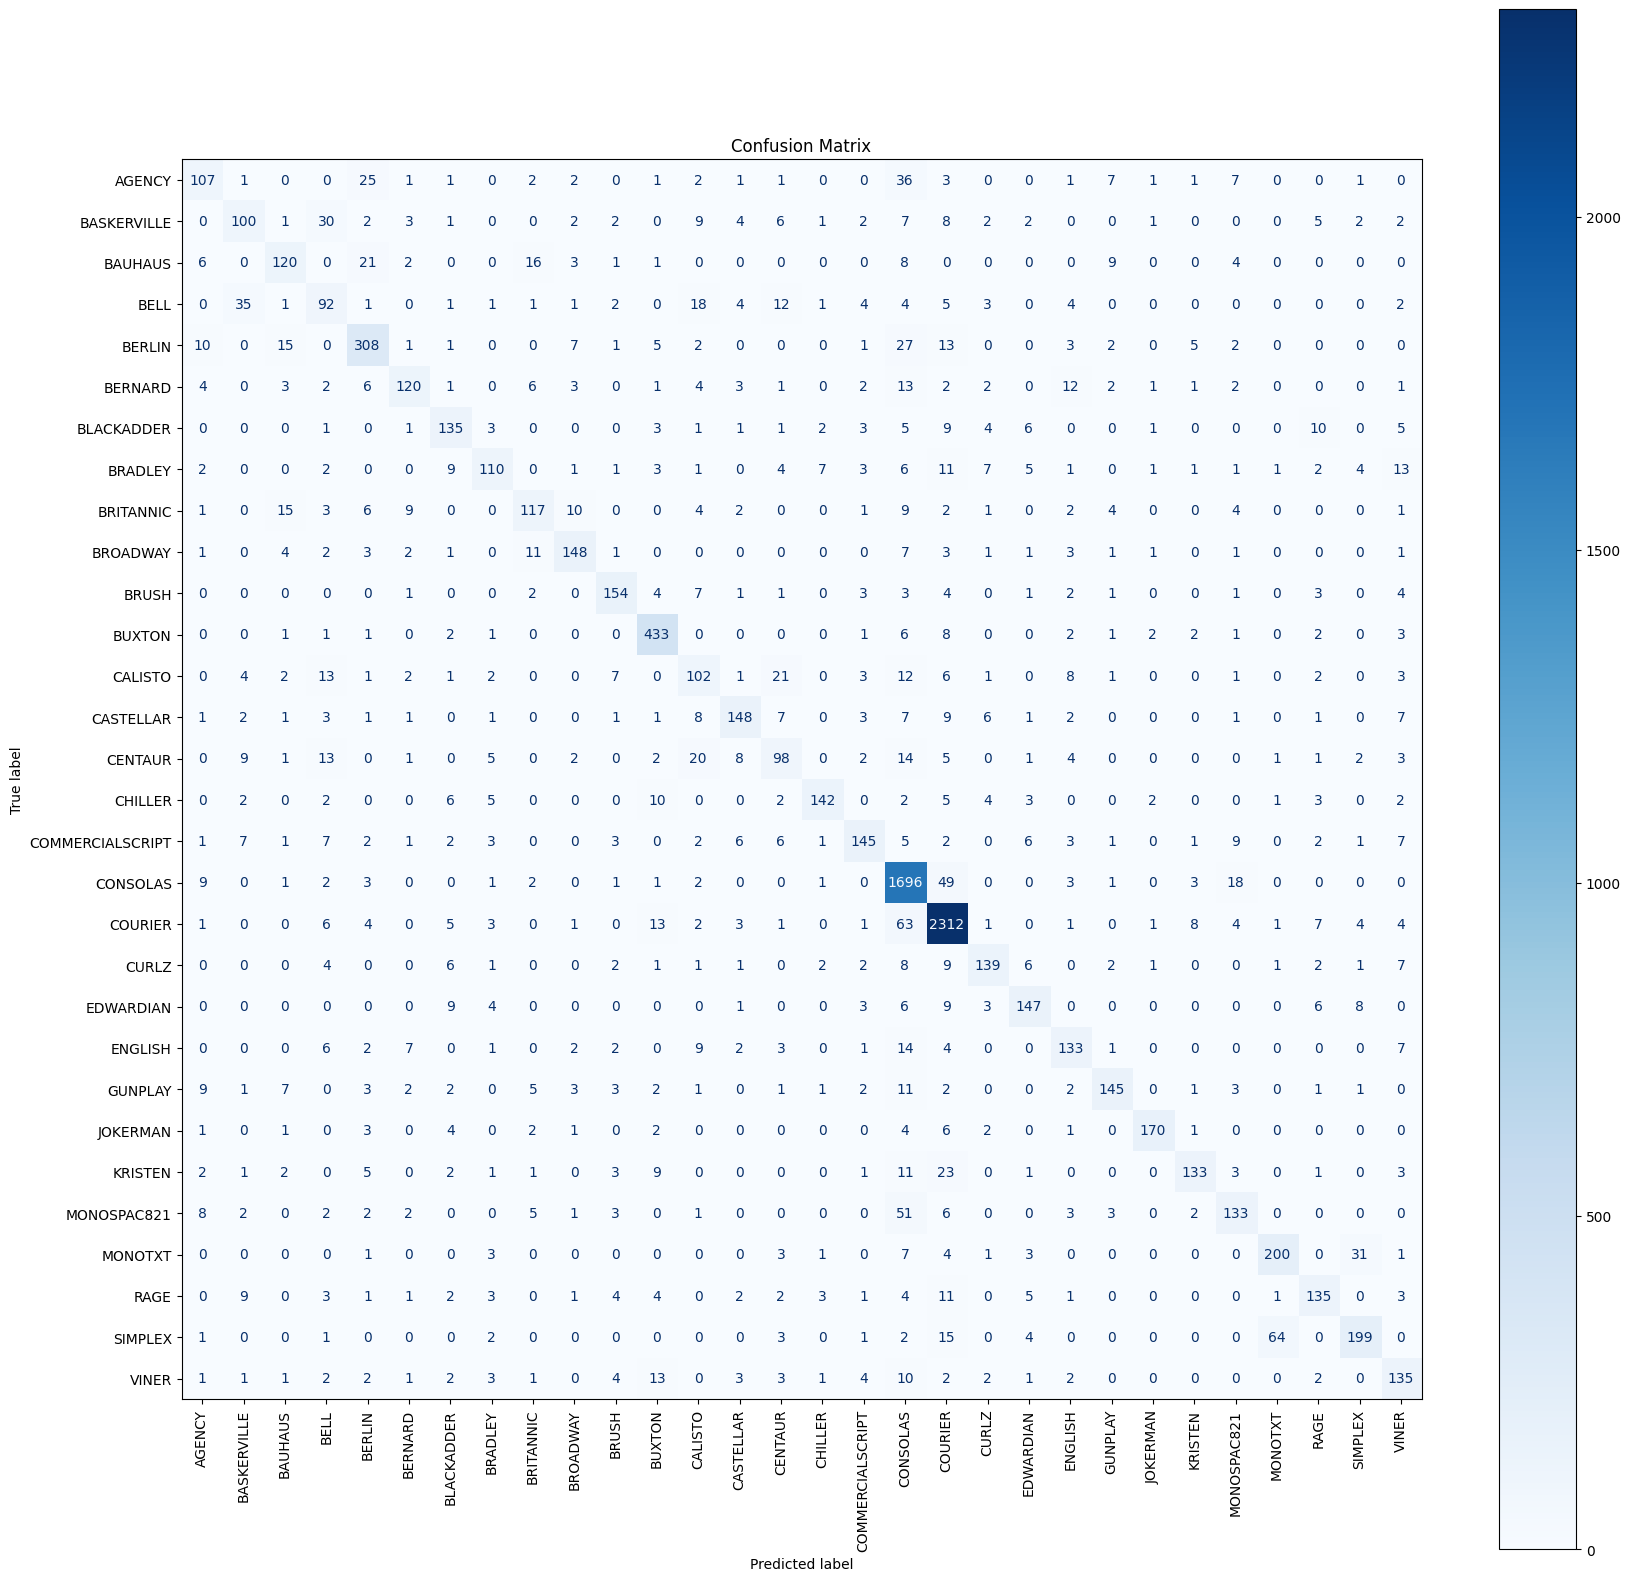

In [24]:
display_confusion_matrix(model=model_v1_1, X_test=X_test, y_test=y_test, class_names=unique_labels)

In [25]:
model_v1_1.save("./models/small-font-recognizer-cnn-v1.1.h5")

Після проведеного експерименту з використанням двох різних архітектур нейронних мереж — FCNN та CNN — для задачі класифікації шрифтів, я виявив, що FCNN показала значно кращі результати, ніж CNN. Тестова точність для FCNN становила 97.7% із втратами 0.136556, тоді як CNN досягла лише 79.3% із втратами 0.791115.

Основною причиною цього, на мою думку, є природа вхідних даних. Датасет складався з 400 стовпців, які вказували на значення пікселів, фактично представляючи шрифт у вигляді вектору. FCNN (повнозв'язна нейронна мережа) краще підходить для такого типу задач, оскільки вона вміє ефективно працювати з даними, представленими у вигляді векторів, і може навчитися складним взаємозв'язкам між пікселями без необхідності врахування просторових залежностей.

CNN, навпаки, розроблена для обробки зображень, де важливими є просторові зв'язки між пікселями (наприклад, виявлення країв, текстур чи фігур). Однак у цьому випадку CNN не змогла досягти високої точності, оскільки дані, хоч і подавались як 20x20 чорно-білі зображення, не мали достатньо складних просторових ознак, які могли б допомогти CNN навчитися ефективно ідентифікувати важливі особливості для класифікації шрифтів.

Таким чином, даний експеримент показав, що для задач класифікації, де просторові залежності між пікселями не є критично важливими, FCNN є більш ефективною моделлю, ніж CNN.